In [1]:
# Load image from directory and displat it 
import os
import skimage.io
import random
import glob 
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torchvision
from src.utils import *
MASK_DIR = os.path.join('data', 'GroundTruth')
IMAGE_DIR = os.path.join('data', 'Original')
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

In [2]:
# Auo reload modules
%load_ext autoreload
%autoreload 2

In [23]:
import src.MaskedPolypDataset as mpd
data_set = mpd.MaskedPolypDataset(
    root = 'data',
    transforms = get_transform(train=False),
    width=512,
    height=512
)
dataloaders = torch.utils.data.DataLoader(
    data_set,
    batch_size=2,
    shuffle=True,
    num_workers=1,
    collate_fn=mpd.collate_fn,
    pin_memory=True
)


In [21]:
im, lb = data_set.__getitem__(0)

boxes shape: (1, 4)


# Scratchpad

In [9]:
# get bounding box coordinates for each mask
def get_mask_coordinates(mask):
    # get all object masks
    num_objs = mask.shape[0]
    boxes = []
    for i in range(num_objs):
        pos = torch.where(mask[i])
        xmin = int(torch.min(pos[1]))
        xmax = int(torch.max(pos[1]))
        ymin = int(torch.min(pos[0]))
        ymax = int(torch.max(pos[0]))
        boxes.append([xmin, ymin, xmax, ymax])
    return boxes

In [27]:
# Get bounding boxes for all masks in directory 
def get_all_boxes(mask_dir):
    mask_files = glob.glob(mask_dir + '/*.tif')
    all_boxes = []
    all_masks = []
    for mask_file in mask_files:
        mask = skimage.io.imread(mask_file)
        all_masks.append(mask)
        mask = torch.from_numpy(mask)
        mask = mask.unsqueeze(0)
        boxes = get_mask_coordinates(mask)
        all_boxes.append(boxes)
    return all_boxes, all_masks

In [28]:
all_boxes, all_masks = get_all_boxes(MASK_DIR)

In [23]:
num_boxes = 0
for boxes in all_boxes:
    num_boxes += len(boxes)

print('Number of boxes: {}'.format(num_boxes))

Number of boxes: 612


In [29]:
all_masks[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# Build pandas dataframe with image file name, bounding box coordinates
# using skimage.io.imread to load images


In [3]:
allimg = list(sorted(glob.glob(os.path.join(IMAGE_DIR, "*.tif"))))

In [4]:
allm = list(sorted(glob.glob(os.path.join(MASK_DIR, "*.tif"))))

In [11]:
m = skimage.io.imread(allm[0])

In [12]:
m.shape

(288, 384)

In [82]:
from skimage.measure import regionprops
props = regionprops(m)

In [13]:
n = m.copy()

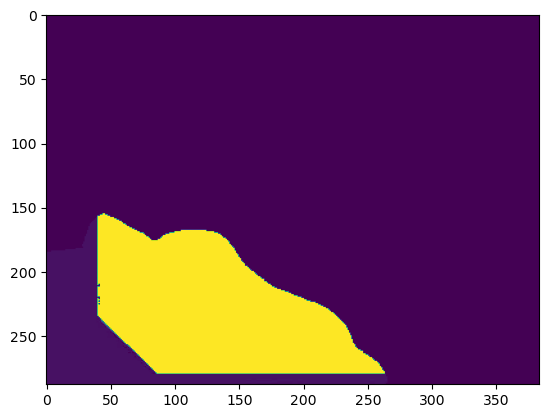

In [14]:
plt.imshow(n)

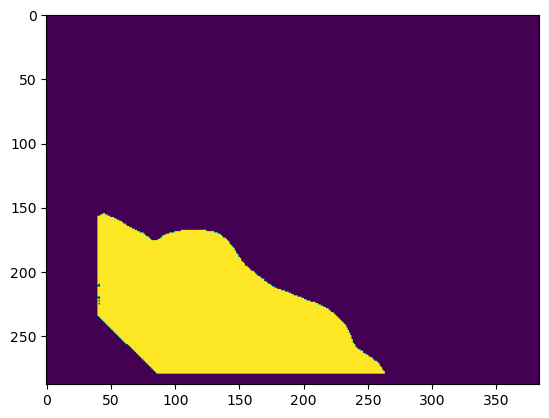

In [15]:
o = n.copy()
o[o < 255] = 0
o[o == 255] = 1
plt.imshow(o)

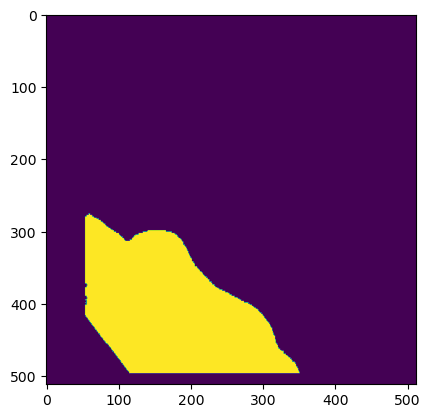

In [213]:
from skimage.transform import resize
o = n.copy()
o = resize(m, (512, 512), mode='constant', preserve_range=True)
o[o < 225] = 0
o[o == 225] = 1
plt.imshow(o)

In [16]:
p = o.copy()
# p[p < 255] = 0
# p[p == 255] = 1
p = torch.as_tensor(p, dtype=torch.uint8)
pos = torch.where(p)



In [35]:
int(torch.min(pos[0]))

155